In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
sns.set(style = 'darkgrid')

### Mortality Rates Analysis 

In [2]:
# load training and testing data
mortality_rates = pd.read_csv('datasets/mort.csv')

In [3]:
print("Number of features in the data:", mortality_rates.shape[1])
print()

# check missing values in training and testing data
print("Number of missing values in the data:", mortality_rates.isnull().sum())

Number of features in the data: 30

Number of missing values in the data: Location                                        0
FIPS                                           21
Category                                        0
Mortality Rate, 1980*                           0
Mortality Rate, 1980* (Min)                     0
Mortality Rate, 1980* (Max)                     0
Mortality Rate, 1985*                           0
Mortality Rate, 1985* (Min)                     0
Mortality Rate, 1985* (Max)                     0
Mortality Rate, 1990*                           0
Mortality Rate, 1990* (Min)                     0
Mortality Rate, 1990* (Max)                     0
Mortality Rate, 1995*                           0
Mortality Rate, 1995* (Min)                     0
Mortality Rate, 1995* (Max)                     0
Mortality Rate, 2000*                           0
Mortality Rate, 2000* (Min)                     0
Mortality Rate, 2000* (Max)                     0
Mortality Rate, 2005*     

We have a lot of columns that we will not use. Rather than type out all the name, I made a list and deleted the ones I didn't want. We can then iterate through the column names and only keep desired columns. Also dropping rows that have aggregates in them already.

In [4]:
mortality_rates = mortality_rates[(mortality_rates.Location.str.contains(',') == True)]
mortality_rates.reset_index(drop=True, inplace=True)

In [5]:
mortality_rates = mortality_rates.drop([
        'Mortality Rate, 1980* (Min)',
        'Mortality Rate, 1980* (Max)',
        'Mortality Rate, 1985* (Min)',
        'Mortality Rate, 1985* (Max)',
        'Mortality Rate, 1990* (Min)',
        'Mortality Rate, 1990* (Max)',
        'Mortality Rate, 1995* (Min)',
        'Mortality Rate, 1995* (Max)',
        'Mortality Rate, 2000* (Min)',
        'Mortality Rate, 2000* (Max)',
        'Mortality Rate, 2005* (Min)',
        'Mortality Rate, 2005* (Max)',
        'Mortality Rate, 2010* (Min)',
        'Mortality Rate, 2010* (Max)',
        'Mortality Rate, 2014* (Max)',
        'Mortality Rate, 2014* (Min)',
        '% Change in Mortality Rate, 1980-2014',
        '% Change in Mortality Rate, 1980-2014 (Min)',
        '% Change in Mortality Rate, 1980-2014 (Max)'
        ],axis=1)
    
print("Number of features in the data:", mortality_rates.shape[1])
print()
mortality_rates.info()

Number of features in the data: 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65982 entries, 0 to 65981
Data columns (total 11 columns):
Location                 65982 non-null object
FIPS                     65982 non-null float64
Category                 65982 non-null object
Mortality Rate, 1980*    65982 non-null float64
Mortality Rate, 1985*    65982 non-null float64
Mortality Rate, 1990*    65982 non-null float64
Mortality Rate, 1995*    65982 non-null float64
Mortality Rate, 2000*    65982 non-null float64
Mortality Rate, 2005*    65982 non-null float64
Mortality Rate, 2010*    65982 non-null float64
Mortality Rate, 2014*    65982 non-null float64
dtypes: float64(9), object(2)
memory usage: 5.5+ MB


Then we splits the county and state and adds each to a new column.

In [6]:
county = []
state = []

x=0
while x < len(mortality_rates):
    p = mortality_rates['Location'][x].index(',')
    county.append(mortality_rates['Location'][x][:p])
    state.append(mortality_rates['Location'][x][p+2:])
    x=x+1
    
mortality_rates['County'] = county
mortality_rates['State'] = state

mortality_rates[['County','State']].head()

,County,State
0,Autauga County,Alabama
1,Baldwin County,Alabama
2,Barbour County,Alabama
3,Bibb County,Alabama
4,Blount County,Alabama


Now that we have all the columns we want, we need to unpivot the data into a more useful format.

In [7]:
mortality_rates.columns

Index(['Location', 'FIPS', 'Category', 'Mortality Rate, 1980*',
       'Mortality Rate, 1985*', 'Mortality Rate, 1990*',
       'Mortality Rate, 1995*', 'Mortality Rate, 2000*',
       'Mortality Rate, 2005*', 'Mortality Rate, 2010*',
       'Mortality Rate, 2014*', 'County', 'State'],
      dtype='object')

In [8]:
melt_mortality_rates = pd.melt(mortality_rates, 
            id_vars = ['Location','FIPS','Category','County','State'], 
            value_vars = ['Mortality Rate, 1980*', 'Mortality Rate, 1985*', 'Mortality Rate, 1990*',
                          'Mortality Rate, 1995*', 'Mortality Rate, 2000*', 'Mortality Rate, 2005*',
                          'Mortality Rate, 2010*', 'Mortality Rate, 2014*',])

melt_mortality_rates.head()

,Location,FIPS,Category,County,State,variable,value
0,"Autauga County, Alabama",1001.0,Neonatal disorders,Autauga County,Alabama,"Mortality Rate, 1980*",9.58
1,"Baldwin County, Alabama",1003.0,Neonatal disorders,Baldwin County,Alabama,"Mortality Rate, 1980*",8.75
2,"Barbour County, Alabama",1005.0,Neonatal disorders,Barbour County,Alabama,"Mortality Rate, 1980*",12.30
3,"Bibb County, Alabama",1007.0,Neonatal disorders,Bibb County,Alabama,"Mortality Rate, 1980*",11.28
4,"Blount County, Alabama",1009.0,Neonatal disorders,Blount County,Alabama,"Mortality Rate, 1980*",6.05


In [9]:
x=0
year = []

while x < len(melt_mortality_rates):
    year.append(melt_mortality_rates['variable'][x][16:20])
    x = x+1
    
melt_mortality_rates['Year'] = year
melt_mortality_rates.Year = melt_mortality_rates.Year.astype(float)
melt_mortality_rates=melt_mortality_rates.drop('variable',1)

melt_mortality_rates=melt_mortality_rates.rename(columns = {'value':'Mortality Rate'})

melt_mortality_rates.head()

,Location,FIPS,Category,County,State,Mortality Rate,Year
0,"Autauga County, Alabama",1001.0,Neonatal disorders,Autauga County,Alabama,9.58,1980.0
1,"Baldwin County, Alabama",1003.0,Neonatal disorders,Baldwin County,Alabama,8.75,1980.0
2,"Barbour County, Alabama",1005.0,Neonatal disorders,Barbour County,Alabama,12.30,1980.0
3,"Bibb County, Alabama",1007.0,Neonatal disorders,Bibb County,Alabama,11.28,1980.0
4,"Blount County, Alabama",1009.0,Neonatal disorders,Blount County,Alabama,6.05,1980.0


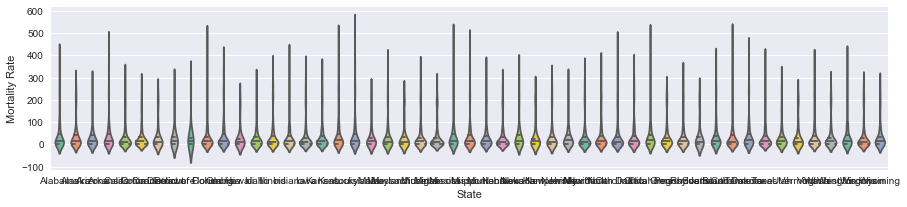

In [10]:
y = sorted(list(melt_mortality_rates['State'].unique()))

plt.figure(figsize = (15,3))
sns.violinplot(y = 'Mortality Rate', x = 'State',
               data = melt_mortality_rates[(melt_mortality_rates['Year'] == 2014)], 
               inner = 'quartile', 
               palette = 'Set2', 
               order = y)

This shows a severe skew in the data. To visualize a little better we will unskew it and graph the states on the y axis.

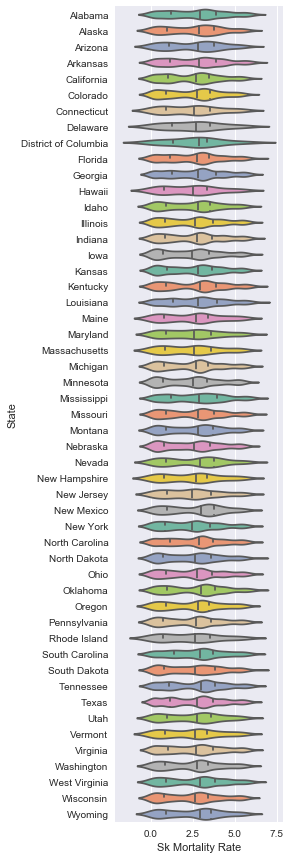

In [11]:
melt_mortality_rates['Sk Mortality Rate']= np.log1p(melt_mortality_rates['Mortality Rate'])
y = sorted(list(melt_mortality_rates['State'].unique()))

plt.figure(figsize = (3,15))
sns.violinplot(x = 'Sk Mortality Rate', y = 'State', 
               data = melt_mortality_rates[(melt_mortality_rates['Year'] == 2014)], 
               inner = 'quartile', 
               palette = 'Set2', 
               order = y)

To look at mortality rates correlations we will use a correlation matrix. The matrix compares variables, so we need to pivot the data to look at Category as the columns. First I am going to clean up some of the column names to make them fit better on the screen.

In [12]:
sorted(list(melt_mortality_rates['Category'].unique()))

['Cardiovascular diseases',
 'Chronic respiratory diseases',
 'Cirrhosis and other chronic liver diseases',
 'Diabetes, urogenital, blood, and endocrine diseases',
 'Diarrhea, lower respiratory, and other common infectious diseases',
 'Digestive diseases',
 'Forces of nature, war, and legal intervention',
 'HIV/AIDS and tuberculosis',
 'Maternal disorders',
 'Mental and substance use disorders',
 'Musculoskeletal disorders',
 'Neglected tropical diseases and malaria',
 'Neonatal disorders',
 'Neoplasms',
 'Neurological disorders',
 'Nutritional deficiencies',
 'Other communicable, maternal, neonatal, and nutritional diseases',
 'Other non-communicable diseases',
 'Self-harm and interpersonal violence',
 'Transport injuries',
 'Unintentional injuries']

In [13]:
table = pd.pivot_table(melt_mortality_rates[(melt_mortality_rates['Year'] == 2014)], 
                   values = 'Mortality Rate', index = ['County','Year','State'], 
                   columns = 'Category', aggfunc = np.mean)  

table_cols = ['Cardiovascular',
              'Chronic resp',
              'Chronic liver',
              'Diabetes',
              'Diarrhea',
              'Digestive diseases',
              'Non Natural',
              'HIV/AIDS and TB',
              'Maternal disorders',
              'Mental disorders',
              'Musculoskeletal disorders',
              'Tropical diseases',
              'Neonatal disorders',
              'Neoplasms',
              'Neurological disorders',
              'Nutritional deficiencies',
              'Other communicable',
              'Other non-communicable',
              'Violence',
              'Transport injuries',
              'Unintentional injuries']

table.columns = table_cols
table.head()

,,,Cardiovascular,Chronic resp,Chronic liver,Diabetes,Diarrhea,Digestive diseases,Non Natural,HIV/AIDS and TB,Maternal disorders,Mental disorders,...,Tropical diseases,Neonatal disorders,Neoplasms,Neurological disorders,Nutritional deficiencies,Other communicable,Other non-communicable,Violence,Transport injuries,Unintentional injuries
County,Year,State,,,,,,,,,,,,,,,,,,,,,
Abbeville County,2014.0,South Carolina,252.42,59.27,20.16,57.49,30.22,15.86,0.06,1.96,0.52,11.14,...,0.05,5.11,216.66,116.88,2.55,1.43,8.11,21.92,21.34,23.24
Acadia Parish,2014.0,Louisiana,363.23,56.09,19.36,68.58,48.68,14.86,0.09,3.18,0.68,13.62,...,0.09,4.59,266.67,124.63,2.44,1.53,8.60,31.00,29.63,23.57
Accomack County,2014.0,Virginia,272.88,60.31,17.89,69.63,39.83,14.09,0.08,3.24,0.50,13.53,...,0.05,4.74,254.18,135.23,1.28,1.61,7.41,24.50,26.82,21.88
Ada County,2014.0,Idaho,211.01,54.67,15.20,42.20,17.79,15.07,0.03,0.56,0.26,10.58,...,0.06,2.15,171.72,120.21,1.36,1.18,5.80,18.82,10.20,17.30
Adair County,2014.0,Iowa,270.87,47.06,12.03,51.62,46.29,17.04,0.05,0.38,0.27,6.46,...,0.06,2.07,194.81,83.72,0.91,0.96,5.58,17.58,22.11,24.82


The correlation matrix is mirrored across the diagonal line, so I went ahead and hid the top part to avoid confusion. Dark red squares mean that it is highly correlated.

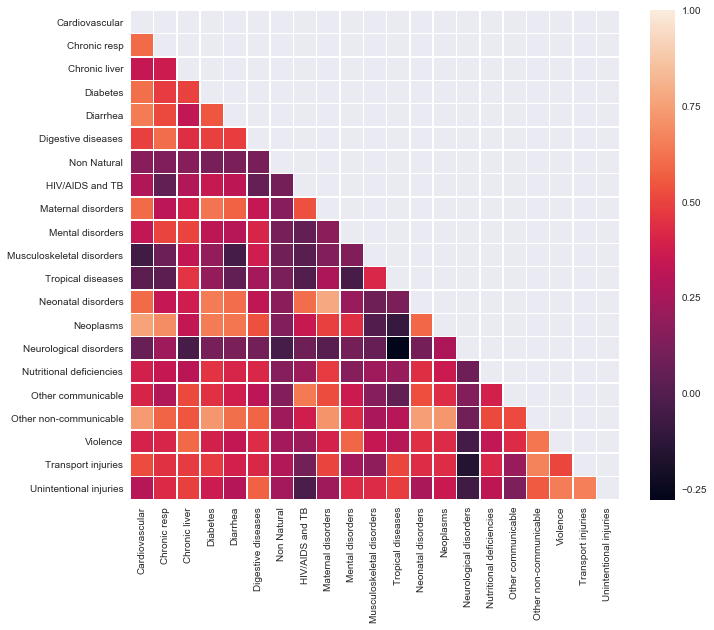

In [14]:
corr = table.corr()
fg, ax = plt.subplots(figsize = (11,9))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask = mask, linewidths = .5, square = True)

In [15]:
pearson_corr = table.corr(method='pearson').abs()

# the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
correlation = (pearson_corr.where(np.triu(np.ones(pearson_corr.shape), k=1)
                              .astype(np.bool)).stack().sort_values(ascending=False))

correlation.head()

Maternal disorders  Neonatal disorders        0.781984
Cardiovascular      Neoplasms                 0.763886
Neonatal disorders  Other non-communicable    0.749684
Cardiovascular      Other non-communicable    0.737324
Diabetes            Other non-communicable    0.728482
dtype: float64

Neoplasms and Cardiovascular disease are very highly correlated. Let's look at a scatter plot of just those two. Adding a kde and bar graphs on the edges helps us understand the concentration of points in the center.

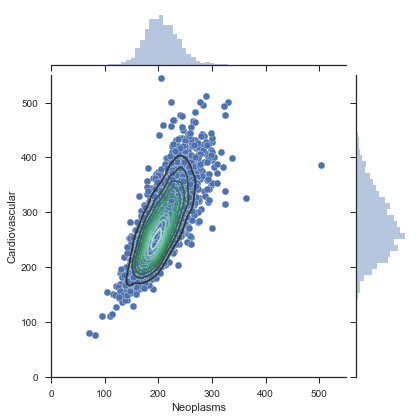

In [16]:
sns.set(style = 'ticks')
table_plot_1 = (sns.jointplot(table['Neoplasms'], table['Cardiovascular'], stat_func=None,edgecolor="w",
                              xlim = (0,550), ylim = (0,550)).plot_joint(sns.kdeplot, zorder = 1, n_levels = 10))

Zooming back out from those two diseases, lets look at some or the relationships between other diseases. Because the top and bottom corners are mirror images, we changed the bottom to a kde plot to get a better understanding of the density of values in the concentrations.

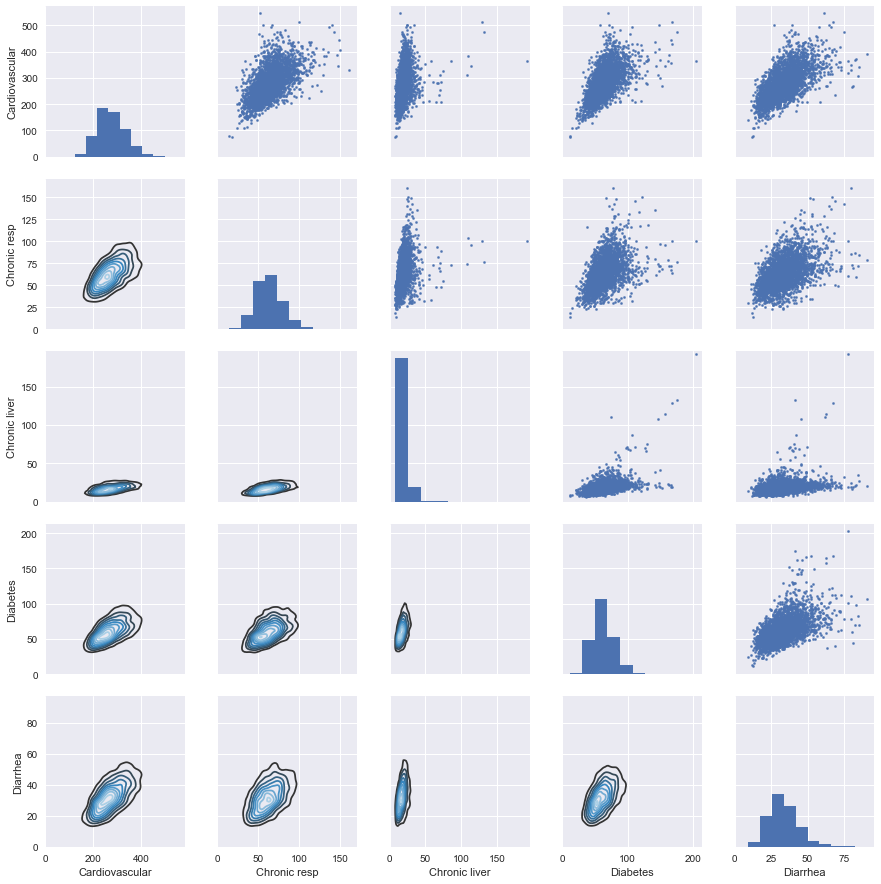

In [17]:
table_plot_2=table.iloc[:,:5]
sns.set(style = 'darkgrid')
g = sns.PairGrid(table_plot_2)
g.map_upper(plt.scatter, s = 5)
g.map_diag(plt.hist, lw = 0, edgecolor = 'w')
g.map_lower(sns.kdeplot, cmap = 'Blues_d')
g.set(ylim = (0,None))
g.set(xlim = (0,None))

Let's make a table with only cardiovascular diseases but with multiple years. Because there are many counties in each state, so we will take the average for the state per year.

In [18]:
cardio = melt_mortality_rates[(melt_mortality_rates['Category'] == 'Cardiovascular diseases')]
cardio = cardio[['Year','State','Mortality Rate']]
#cardio = cardio.groupby(['Year','State']).mean()
cardio.reset_index(inplace=True)
cardio.head()

,index,Year,State,Mortality Rate
0,40846,1980.0,Alabama,552.68
1,40847,1980.0,Alabama,445.67
2,40848,1980.0,Alabama,515.53
3,40849,1980.0,Alabama,548.69
4,40850,1980.0,Alabama,473.26


We can use this table to see the year over year change in mortality rates of cardiovascular disease. We can see that mortality rates are dropping in every state.

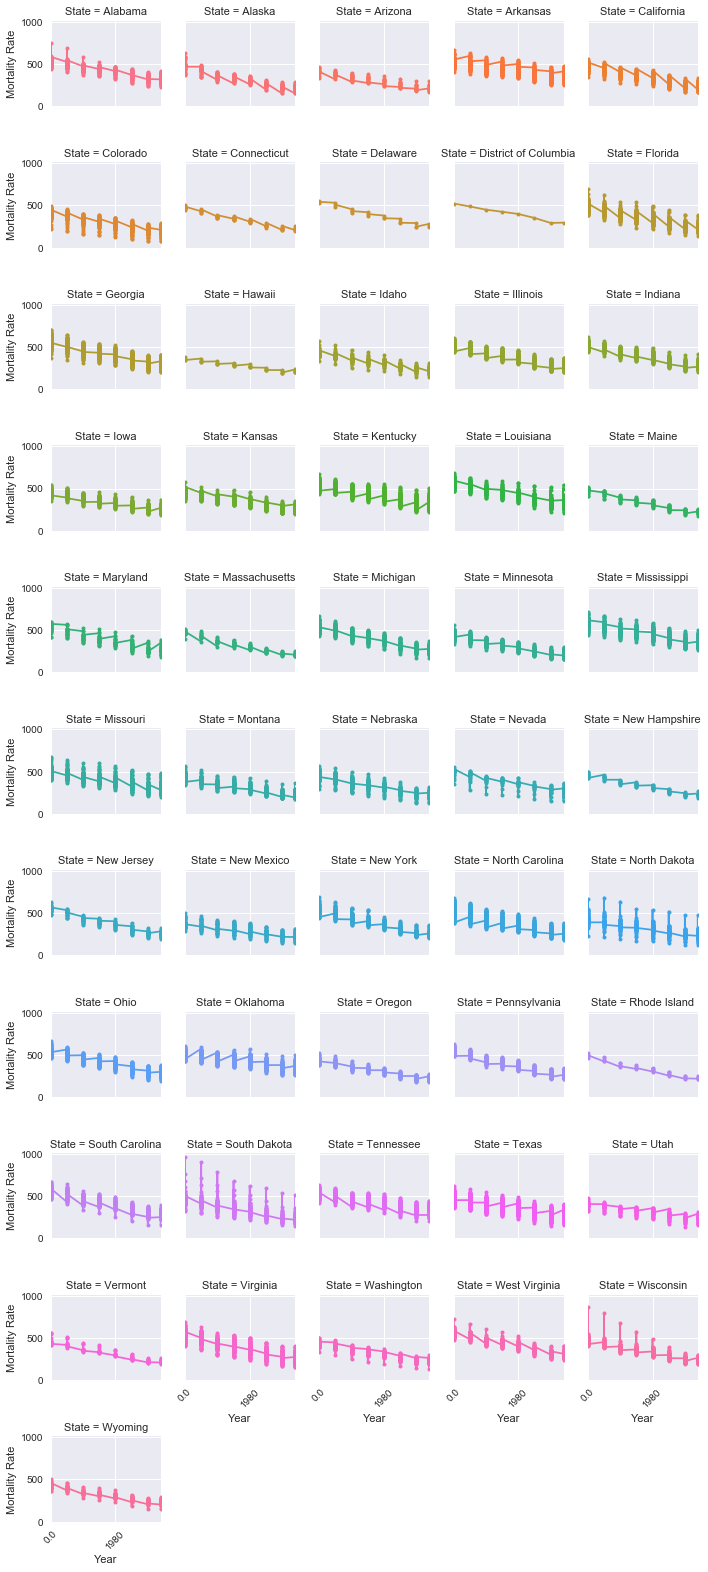

In [19]:
grid = sns.FacetGrid(cardio, col = 'State', hue = 'State', col_wrap = 5, size = 2)
grid.map(plt.plot, 'Year', 'Mortality Rate',ms = 4, marker ='o')
grid.set(xlim=(1980, 2014), ylim = (0,None))
grid.set_xticklabels(rotation = 45)
grid.fig.tight_layout(w_pad = 1)

The last chart showed us that there was a general decline in mortality rate, but it wasn't clear on how each state was doing relative to each other. For this we will find the % change in mortality rates for cardiovascular disease from 1980 to 2014. To do this will will need to reshape our table to do that calculation easily.

In [20]:
cardio = pd.pivot_table(cardio, values = 'Mortality Rate', index = ['State'], columns = 'Year', aggfunc = np.mean)
cardio.reset_index(inplace=True)

# changing columns because I could not call when the column name was a year number
cardio.columns = ['State','One','Two','Three','Four','Five','Sx','Seven','Eight']

cardio['Delta'] = ''
delta = []
x=0

while x < len(cardio):
    y = cardio['One'][x] 
    z = cardio['Eight'][x]
    delta.append((z-y)/y)
    
    x=x+1

cardio['Delta'] = delta
    
cardio.head()

,State,One,Two,Three,Four,Five,Sx,Seven,Eight,Delta
0,Alabama,526.954328,498.024179,450.712090,436.220896,415.470448,369.677612,328.869104,329.501343,-0.374706
1,Alaska,480.126207,419.686897,356.804828,333.187241,306.607241,257.860690,222.537586,222.845172,-0.535861
2,Arizona,411.335333,379.146667,335.766667,316.097333,285.434000,252.837333,219.314000,217.806667,-0.470489
3,Arkansas,522.188400,495.439067,453.963333,445.558667,427.723467,383.091867,345.631067,349.178400,-0.331317
4,California,455.754483,424.305345,375.381207,351.722759,325.205517,279.154655,243.175172,237.626897,-0.478608


Now let's see which state has had the largest reduction in mortality rate. We are looking for the lowest number (high drop in mortality), Congrats Massachusetts! Further analysis might try to find some regional correlation to mortality rates decline.

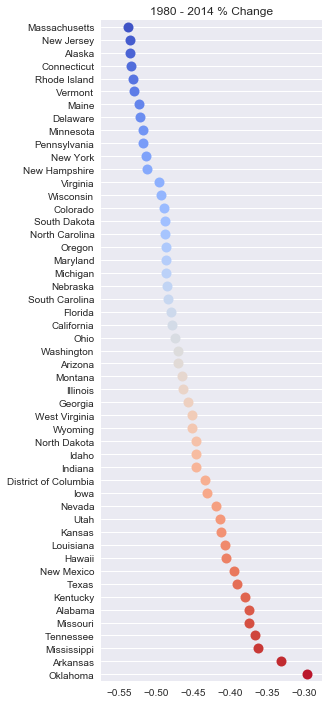

In [21]:
sns.set(style="darkgrid")

g = sns.PairGrid(cardio.sort_values(by = 'Delta', ascending = True), x_vars = 'Delta', y_vars = 'State', size = 10, aspect = .4)
g.map(sns.stripplot, size = 10, orient = 'h', palette = 'coolwarm', edgecolor = 'w')
g.set(xlabel='', ylabel='')

titles = ['1980 - 2014 % Change']
for ax, title in zip(g.axes.flat, titles):
    # set a different title for each axes
    ax.set(title=title)

    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

### Death Rate Ratio Analysis

In [22]:
# loading bar/cosmetic
from tqdm import tqdm

def function_value_split (array):
    array = str(array)
    avg = float(array.split('(')[0])
    y = array.split('(')[1]
    min_value = float(y.split(',')[0])
    max_value = float(y.split(',')[1].replace(')',''))   
    return (avg, min_value, max_value)

sheet_names = [u'HIV-AIDS & tuberculosis',
               u'Diarrhea, lower respiratory',
               u'Neglected tropical diseases',
               u'Maternal disorders',
               u'Neonatal disorders',
               u'Nutritional deficiencies',
               u'Other communicable, maternal, ',
               u'Neoplasms',
               u'Cardiovascular diseases',
               u'Chronic respiratory diseases',
               u'Cirrhosis & other chronic ',
               u'Digestive diseases',
               u'Neurological disorders',
               u'Mental & substance use ',
               u'Diabetes, urogenital, blood',
               u'Musculoskeletal disorders',
               u'Other non-communicable ',
               u'Transport injuries',
               u'Unintentional injuries',
               u'Self-harm & interpersonal ',
               u'Forces of nature, war, & legal ']

df = {}
for sheet in tqdm(sheet_names):
    df[sheet.strip()] = pd.read_excel('datasets/mort.XLSX', sheetname=sheet, skiprows=1)[:3000]

100%|██████████████████████████████████████████| 21/21 [03:20<00:00,  9.58s/it]


In [23]:
sheets = [x.strip() for x in sheet_names]

main_df = pd.DataFrame([], columns=['condition','1980','1985','1990','1995','2000','2005','2010','2014',
                                    '% change 1980-2014'])

for sheet in sheets:
    
    dummy_array = []
    dummy_array = dummy_array + [sheet]
    columns = df[sheet].columns[2:]
    
    for column in columns:
        (avg, min_v, max_v) = function_value_split (df[sheet].loc[0, column])
        dummy_array = dummy_array + [avg]
        
    main_df.loc[len(main_df)] = dummy_array
    
main_df.loc[len(main_df)] = main_df.sum(0)
main_df.loc[len(main_df)-1, 'condition'] = 'sum'

A = main_df.loc[main_df['condition']=='sum', main_df.columns[1:-1]]
B = main_df.loc[main_df['condition']=='sum', main_df.columns[1:-1]].T.shift(1).T

perc_decrease = np.round (1-A/B,3)
perc_decrease

,1980,1985,1990,1995,2000,2005,2010,2014
21,NaN,0.044,0.053,0.015,0.052,0.067,0.079,0.007


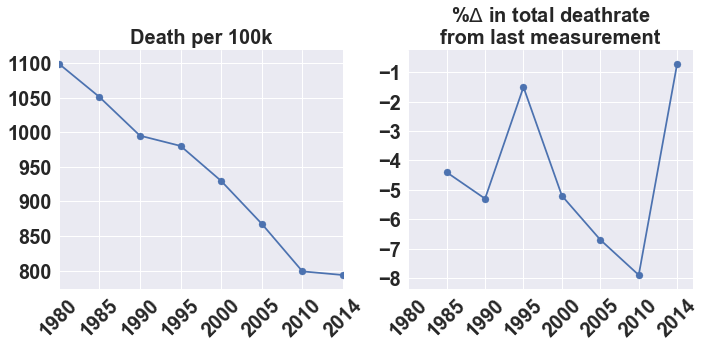

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
text_opts = {'fontsize':20, 'fontweight':'bold'}

y = main_df[main_df.columns[1:-1]].loc[len(main_df)-1]
x = np.arange (len(main_df.columns[1:-1]))

y.plot()
plt.scatter(x,y)
plt.title ('Death per 100k', **text_opts)
plt.xticks(rotation='45', **text_opts)
plt.yticks(**text_opts);

plt.subplot(1,2,2)

y = -perc_decrease.loc[21].values*100
x = np.arange (len(main_df.columns[1:-1]))

plt.plot(x,y)
plt.scatter(x,y)
plt.title ('%$\Delta$ in total deathrate\nfrom last measurement', **text_opts)
plt.xticks(x, main_df.columns[1:-1], rotation='45', **text_opts)
plt.yticks(**text_opts);

plt.tight_layout()

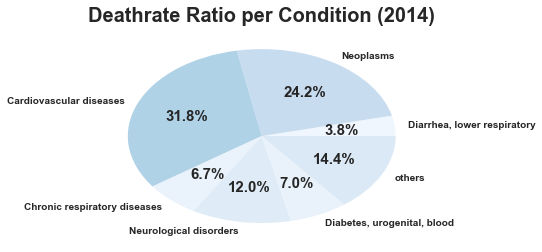

In [25]:
threshold = 0.03

indexes = []
values = []
others = 0

for index in main_df['condition'][:-1]:
    
    temp_value = main_df.loc[main_df['condition']==index, '2014']
    temp_perc = temp_value / float (main_df.loc[main_df['condition']=='sum', '2014'])
    
    if temp_perc.get_values()[0] >= threshold:
        indexes = indexes + [index] 
        values = values + [temp_perc.get_values()[0]]
    else:
        others = others + temp_perc.get_values()[0]

indexes = indexes + ['others']
values = values + [others]
cmap = cm.Blues
mpl.rcParams['font.size'] = 15.0
mpl.rcParams['font.weight'] = 'bold'

plt.pie(values, labels=indexes, autopct='%1.1f%%', colors = cmap(values));
plt.title('Deathrate Ratio per Condition (2014)', **text_opts)

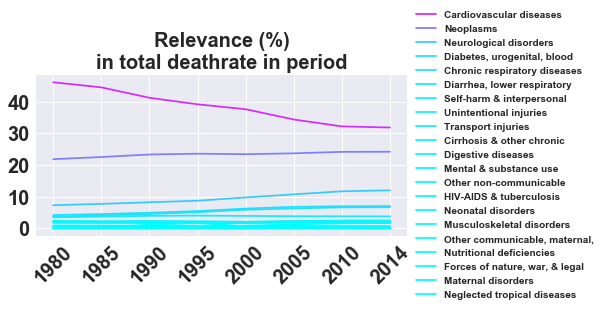

In [26]:
condition_progression = {}
for index in main_df.index[:-1]:
    condition = main_df.loc[index, 'condition']
    condition_progression[condition]=[]
    for column in main_df[main_df.columns[1:-1]]:
        condition_progression[condition] = condition_progression[condition] + \
        [main_df.loc[index,column]/float(main_df.loc[len(main_df)-1,column])]
        
min_v = np.min(min(condition_progression.values()))
max_v = np.max(max(condition_progression.values()))

norm = mpl.colors.Normalize(vmin=min_v, vmax=max_v)
cmap = cm.cool
cmap_normalized = cm.ScalarMappable(norm=norm, cmap=cmap)

fig = plt.figure()
ax = plt.subplot(111)

lgd_array = pd.DataFrame([], columns = ['label','mean'])

for condition in condition_progression:
    lgd_array.loc[len(lgd_array)]  = [condition,np.mean(condition_progression[condition])]

lgd_array = lgd_array.sort_values('mean', ascending=False)

for condition in lgd_array['label']:
    color = cmap_normalized.to_rgba(np.mean(condition_progression[condition]))
    plt.plot(np.arange(len(condition_progression[condition])), np.multiply(condition_progression[condition],100), c=color)
    
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(lgd_array.label, loc='center left', bbox_to_anchor=(1, 0.5))

x = np.arange (len(main_df.columns[1:-1]))

plt.title ('Relevance (%)\nin total deathrate in period', **text_opts)
plt.xticks(x, main_df.columns[1:-1], rotation='45', **text_opts)
plt.yticks(**text_opts);

plt.tight_layout()